In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [ ]:
mnist= tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train,x_test= x_train/255.0,x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_train[0].shape)

(28, 28)


In [ ]:
#expand the dimension to 3
x_train= np.expand_dims(x_train,-1)
x_test= np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
k=len(set(y_train))
print(k)

10


In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:

i= Input(shape=x_train[0].shape)
x= Conv2D(32,(3,3),strides=2,activation='relu')(i)
x= Conv2D(64,(3,3),strides=2,activation='relu')(x)
x= Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)
model=Model(i,x)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r= model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5130 - accuracy: 0.8109 - val_loss: 0.3918 - val_accuracy: 0.8571
Epoch 2/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3536 - accuracy: 0.8670 - val_loss: 0.3366 - val_accuracy: 0.8802
Epoch 3/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3066 - accuracy: 0.8847 - val_loss: 0.3343 - val_accuracy: 0.8747
Epoch 4/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2763 - accuracy: 0.8957 - val_loss: 0.3147 - val_accuracy: 0.8843
Epoch 5/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2495 - accuracy: 0.9063 - val_loss: 0.2872 - val_accuracy: 0.8978
Epoch 6/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2251 - accuracy: 0.9159 - val_loss: 0.3072 - val_accuracy: 0.8916
Epoch 7/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2085 - accuracy: 0.9211 - val_loss: 0.2976 -

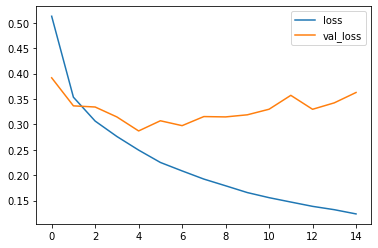

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

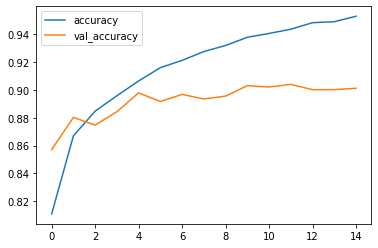

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 2s 7ms/step - loss: 0.3629 - accuracy: 0.9011
[0.3628824055194855, 0.9010999798774719]
